In [1]:
%matplotlib inline

import os
import sys
import math
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import invisible_cities.core.fit_functions  as fitf
from   invisible_cities.icaro.hst_functions import hist
from   invisible_cities.icaro.hst_functions import hist2d
from   invisible_cities.core.core_functions import in_range
from   invisible_cities.icaro.hst_functions import shift_to_bin_centers

from   invisible_cities.reco import tbl_functions as tbl

from icaro.core.fit_functions import expo_seed

In [21]:
# Plotting style
default_cmap = "jet"
figure_size  = 12.5, 12.5
font_size    = 15

plt.rcParams["figure.figsize"] = figure_size
plt.rcParams[  "font.size"   ] =   font_size

In [4]:
nsteps = 5
nsteps2 = nsteps*2

true_r1 = [[] for i in range(0, nsteps)]
true_r2 = [[] for i in range(0, nsteps)]

touched_sipms1_int  = [[] for i in range(0, nsteps)]
touched_sipms2_int  = [[] for i in range(0, nsteps)]
touched_sipms1_ext  = [[] for i in range(0, nsteps)]
touched_sipms2_ext  = [[] for i in range(0, nsteps)]
ratio1 = [[] for i in range(0, nsteps)]
ratio2 = [[] for i in range(0, nsteps)]

bunch = 1
for f in range(0, 100, bunch):
    filename = '/Users/paola/PETALO/analysis/observables/photoelectric/full_ring_depth3cm_pitch6mm_phot_r_{0}_1_5_5.npz'.format(f)
    try:
        d = np.load(filename)
    except:
        print('No')
        continue  


    for i in range(nsteps):
        variable_name = 'a_touched_sipms1_int_{}'.format(i)
        touched_sipms1_int[i] = np.concatenate((touched_sipms1_int[i], d[variable_name]))
        variable_name = 'a_touched_sipms2_int_{}'.format(i)
        touched_sipms2_int[i] = np.concatenate((touched_sipms2_int[i], d[variable_name]))
        variable_name = 'a_touched_sipms1_ext_{}'.format(i)
        touched_sipms1_ext[i] = np.concatenate((touched_sipms1_ext[i], d[variable_name]))
        variable_name = 'a_touched_sipms2_ext_{}'.format(i)
        touched_sipms2_ext[i] = np.concatenate((touched_sipms2_ext[i], d[variable_name]))
        variable_name = 'a_ratio1_{}'.format(i)
        ratio1[i] = np.concatenate((ratio1[i], d[variable_name]))
        variable_name = 'a_ratio2_{}'.format(i)
        ratio2[i] = np.concatenate((ratio2[i], d[variable_name]))
        variable_name = 'a_true_r1_{}'.format(i)
        true_r1[i] = np.concatenate((true_r1[i], d[variable_name]))
        variable_name = 'a_true_r2_{}'.format(i)
        true_r2[i] = np.concatenate((true_r2[i], d[variable_name]))
        

for i in range(0, nsteps):
    true_r1[i] = np.array(true_r1[i])
    true_r2[i] = np.array(true_r2[i])
    ratio1[i] = np.array(ratio1[i])
    ratio2[i] = np.array(ratio2[i])
    touched_sipms1_int[i] = np.array(touched_sipms1_int[i])
    touched_sipms2_int[i] = np.array(touched_sipms2_int[i])
    touched_sipms1_ext[i] = np.array(touched_sipms1_ext[i])
    touched_sipms2_ext[i] = np.array(touched_sipms2_ext[i])

No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No


In [23]:
nsteps = 10

true_r1 = [[] for i in range(0, nsteps)]
true_r2 = [[] for i in range(0, nsteps)]
touched_sipms1_int  = [[] for i in range(0, nsteps)]
touched_sipms2_int  = [[] for i in range(0, nsteps)]
touched_sipms1_ext  = [[] for i in range(0, nsteps)]
touched_sipms2_ext  = [[] for i in range(0, nsteps)]
ratio1 = [[] for i in range(0, nsteps)]
ratio2 = [[] for i in range(0, nsteps)]

bunch = 5
#for f in range(0, 600, bunch):
#    filename = '/Users/paola/PETALO/analysis/observables/photoelectric/full_ring_depth3cm_pitch4mm_phot_z_{0}_{1}_0.npz'.format(f, bunch)
#    try:
#        d = np.load(filename)
#    except:
#        print('No')
#        continue  

#    for i in range(5):
#        variable_name = 'a_touched_sipms1_int_{}'.format(i)
#        touched_sipms1_int[i] = np.concatenate((touched_sipms1_int[i], d[variable_name]))
#        variable_name = 'a_touched_sipms2_int_{}'.format(i)
#        touched_sipms2_int[i] = np.concatenate((touched_sipms2_int[i], d[variable_name]))
#        variable_name = 'a_touched_sipms1_ext_{}'.format(i)
#        touched_sipms1_ext[i] = np.concatenate((touched_sipms1_ext[i], d[variable_name]))
#        variable_name = 'a_touched_sipms2_ext_{}'.format(i)
#        touched_sipms2_ext[i] = np.concatenate((touched_sipms2_ext[i], d[variable_name]))
#        variable_name = 'a_ratio1_{}'.format(i)
#        ratio1[i] = np.concatenate((ratio1[i], d[variable_name]))
#        variable_name = 'a_ratio2_{}'.format(i)
#        ratio2[i] = np.concatenate((ratio2[i], d[variable_name]))
#        variable_name = 'a_true_r1_{}'.format(i)
#        true_r1[i] = np.concatenate((true_r1[i], d[variable_name]))
#        variable_name = 'a_true_r2_{}'.format(i)
#        true_r2[i] = np.concatenate((true_r2[i], d[variable_name]))
        
for f in range(0, 600, bunch):
    filename = '/Users/paola/PETALO/analysis/observables/photoelectric/full_ring_depth3cm_pitch4mm_phot_z_{0}_{1}_5.npz'.format(f, bunch)
    try:
        d = np.load(filename)
    except:
        print('No')
        continue  

    for i in range(5, nsteps):
        numb = i - 5
        variable_name = 'a_touched_sipms1_int_{}'.format(numb)
        touched_sipms1_int[i] = np.concatenate((touched_sipms1_int[i], d[variable_name]))
        variable_name = 'a_touched_sipms2_int_{}'.format(numb)
        touched_sipms2_int[i] = np.concatenate((touched_sipms2_int[i], d[variable_name]))
        variable_name = 'a_touched_sipms1_ext_{}'.format(numb)
        touched_sipms1_ext[i] = np.concatenate((touched_sipms1_ext[i], d[variable_name]))
        variable_name = 'a_touched_sipms2_ext_{}'.format(numb)
        touched_sipms2_ext[i] = np.concatenate((touched_sipms2_ext[i], d[variable_name]))
        variable_name = 'a_ratio1_{}'.format(numb)
        ratio1[i] = np.concatenate((ratio1[i], d[variable_name]))
        variable_name = 'a_ratio2_{}'.format(numb)
        ratio2[i] = np.concatenate((ratio2[i], d[variable_name]))
        variable_name = 'a_true_r1_{}'.format(numb)
        true_r1[i] = np.concatenate((true_r1[i], d[variable_name]))
        variable_name = 'a_true_r2_{}'.format(numb)
        true_r2[i] = np.concatenate((true_r2[i], d[variable_name]))


In [24]:
for i in range(0, nsteps):
    true_r1[i] = np.array(true_r1[i])
    true_r2[i] = np.array(true_r2[i])
    ratio1[i] = np.array(ratio1[i])
    ratio2[i] = np.array(ratio2[i])
    touched_sipms1_int[i] = np.array(touched_sipms1_int[i])
    touched_sipms2_int[i] = np.array(touched_sipms2_int[i])
    touched_sipms1_ext[i] = np.array(touched_sipms1_ext[i])
    touched_sipms2_ext[i] = np.array(touched_sipms2_ext[i])

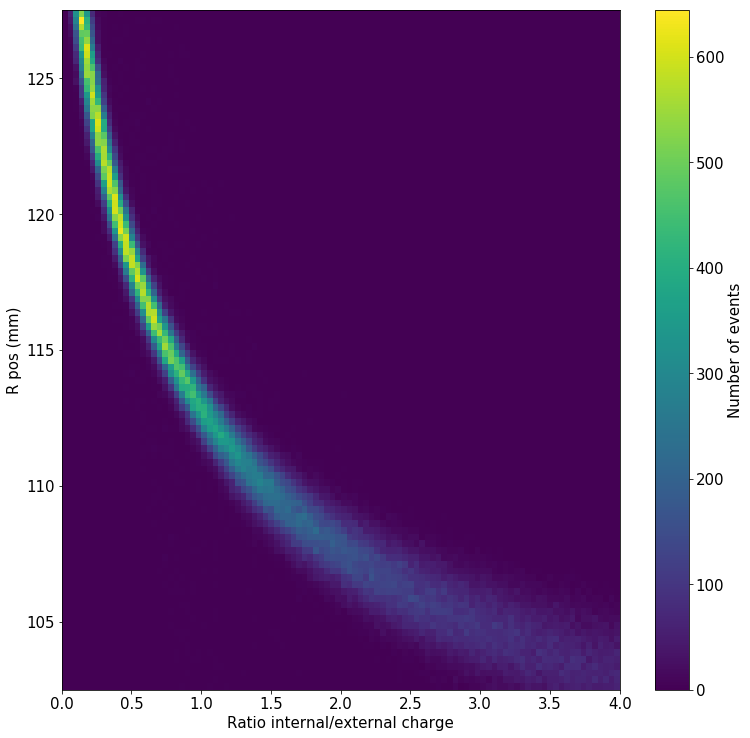

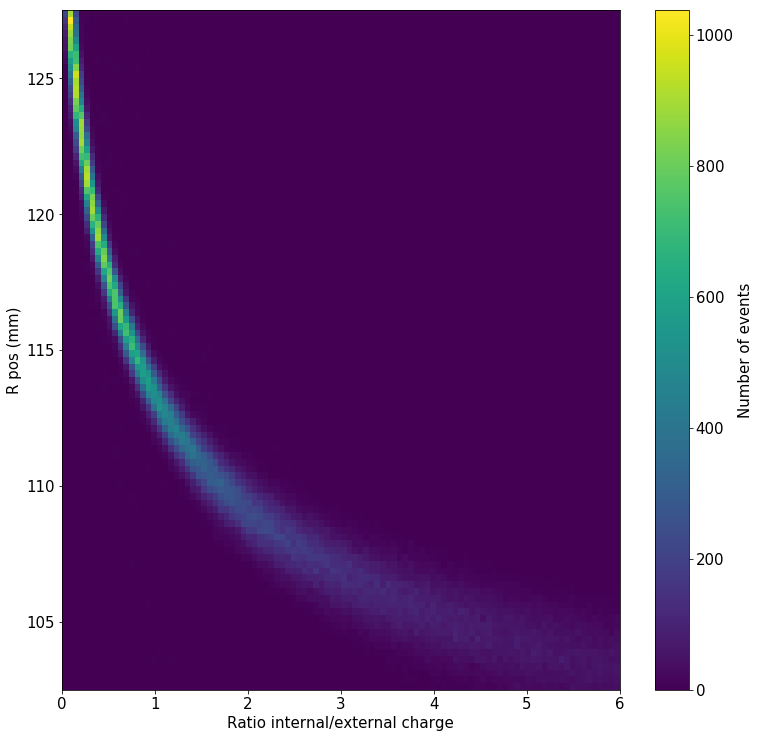

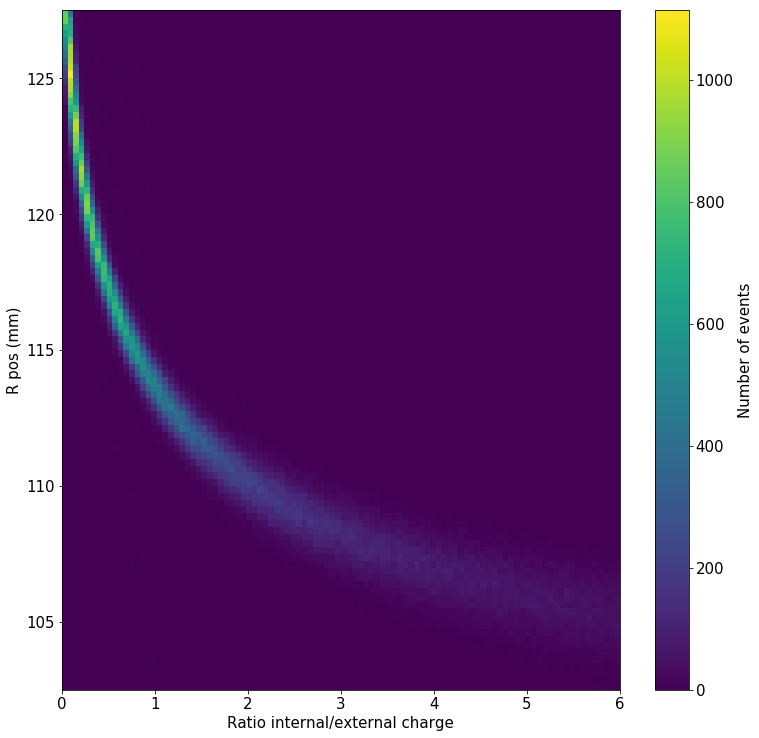

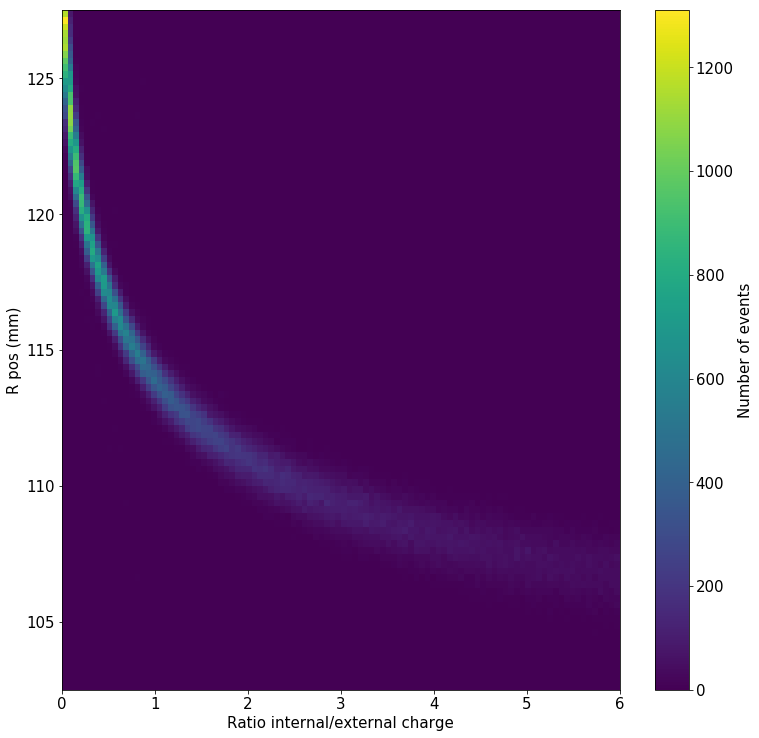

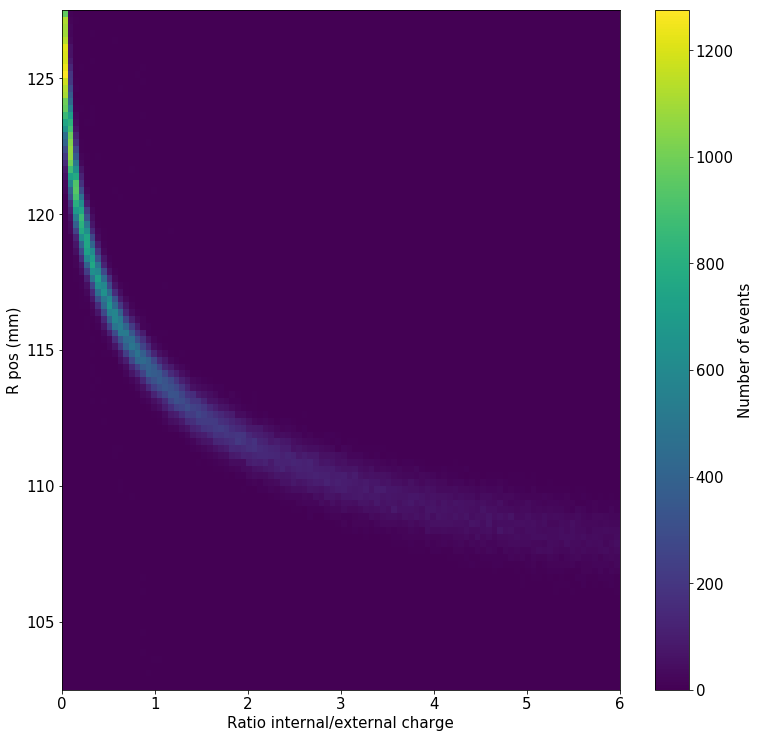

In [34]:
ratios = [[] for i in range(0, nsteps)]
radii = [[] for i in range(0, nsteps)]
ranges = [((0., 5), (102.5, 127.5)), ((0., 5), (102.5, 127.5)), ((0.2, 2.), (102.5, 127.5)), 
          ((0, 3), (102.5, 127.5)), ((0, 4), (102.5, 127.5)), ((0, 4), (102.5, 127.5)), 
          ((0, 6), (102.5, 127.5)), ((0, 6), (102.5, 127.5)), ((0, 6), (102.5, 127.5)), ((0, 6), (102.5, 127.5))]
for v in range(5, nsteps):
    fig = plt.figure(1)
    fig.set_figwidth(12.)
    fig.set_figheight(8.)

    valid1 = [ratio1[v] < 1.e9]
    valid2 = [ratio2[v] < 1.e9]
   # plt.subplot(2, 3, v+1)
    bins = 100
    ratio = np.concatenate((ratio1[v][valid1], ratio2[v][valid2]))
    radius = np.concatenate((true_r1[v][valid1], true_r2[v][valid2]))
    ratios[v] = ratio
    radii[v] = radius
    #print('**** Cut at {} pes ****'.format(v))
    h2 = hist2d(ratio, radius, bins=(bins, bins), range=ranges[v])
    plt.xlabel('Ratio internal/external charge')
    plt.ylabel('R pos (mm)')
    plt.colorbar().set_label("Number of events")
    fig.savefig('radial_ratio_4mm_thr5pes.pdf')
    

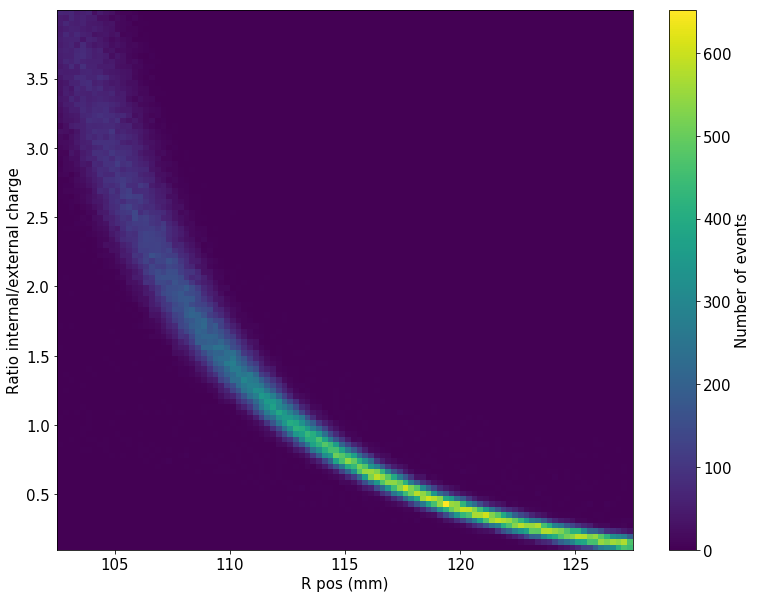

In [36]:
radlim =  102.5, 127.5
ratiolim = 0.1, 4.
rad = radii[5]
ratio = ratios[5]

sel  = in_range(rad, *radlim) & in_range(ratio, *ratiolim)
r, rt = rad[sel], ratio[sel]

frame_data = plt.gcf().add_axes((.1, .3,
                                 .8, .6))
Rbins = 100
Ratiobins = 100

plt.hist2d(r, rt, (Rbins, Ratiobins))

#x, y, yu = fitf.profileX(r, rt, Rbins, radlim)
#plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=7, lw=3)
plt.ylabel('Ratio internal/external charge')
plt.xlabel('R pos (mm)')
plt.colorbar().set_label("Number of events")

#seed = expo_seed(x, y)
#f    = fitf.fit(fitf.expo, x, y, seed)
#seed = (1, 1, 1, 1, 1, 1)

#f    = fitf.fit(fitf.polynom, x, y, seed)
#plt.plot(x, f.fn(x), "r-", lw=4)

#frame_data.set_xticklabels([])
#labels("", "Radius (mm)", "Ratio fit example")
#lims = plt.xlim()

#frame_res = plt.gcf().add_axes((.1, .1,
#                                .8, .2))
#plt.errorbar(x, (f.fn(x) - y) / yu, 1, np.diff(x)[0] / 2, fmt="p", c="k")
#plt.plot(lims, (0, 0), "g--")
#plt.xlim(*lims)

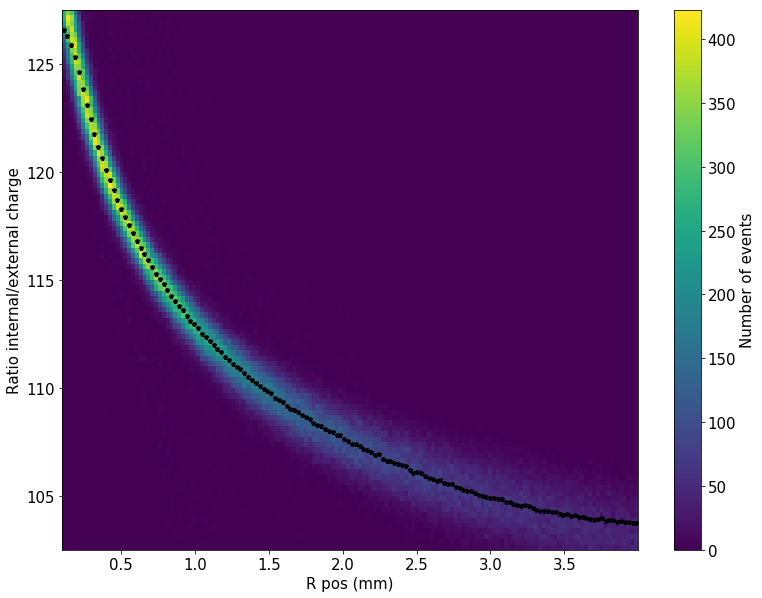

In [37]:
radlim =  102.5, 127.5
ratiolim = 0.1, 4.
rad = radii[5]
ratio = ratios[5]

sel  = in_range(rad, *radlim) & in_range(ratio, *ratiolim)
rt, r= ratio[sel], rad[sel]

frame_data = plt.gcf().add_axes((.1, .3,
                                 .8, .6))
Rbins = 100
Ratiobins = 150

plt.hist2d(rt, r, (Ratiobins, Rbins))

x, y, yu = fitf.profileX(rt, r, Ratiobins, ratiolim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.ylabel('Ratio internal/external charge')
plt.xlabel('R pos (mm)')
plt.colorbar().set_label("Number of events")
#seed = expo_seed(x, y)
#f    = fitf.fit(fitf.expo, x, y, seed)
#seed = (-1, 1)
#f    = fitf.fit(fitf.ln, x, y, seed)

#plt.plot(x, f.fn(x), "r-", lw=4)
#print(f.values[:])

#frame_data.set_xticklabels([])
#labels("", "Radius (mm)", "Ratio fit example")
#lims = plt.xlim()

#frame_res = plt.gcf().add_axes((.1, .1,
 #                               .8, .2))
#plt.errorbar(x, (f.fn(x) - y) / yu, 1, np.diff(x)[0] / 2, fmt="p", c="k")
#plt.plot(lims, (0, 0), "g--")
#plt.xlim(*lims)

In [24]:
x

array([ 0.1195,  0.1585,  0.1975,  0.2365,  0.2755,  0.3145,  0.3535,
        0.3925,  0.4315,  0.4705,  0.5095,  0.5485,  0.5875,  0.6265,
        0.6655,  0.7045,  0.7435,  0.7825,  0.8215,  0.8605,  0.8995,
        0.9385,  0.9775,  1.0165,  1.0555,  1.0945,  1.1335,  1.1725,
        1.2115,  1.2505,  1.2895,  1.3285,  1.3675,  1.4065,  1.4455,
        1.4845,  1.5235,  1.5625,  1.6015,  1.6405,  1.6795,  1.7185,
        1.7575,  1.7965,  1.8355,  1.8745,  1.9135,  1.9525,  1.9915,
        2.0305,  2.0695,  2.1085,  2.1475,  2.1865,  2.2255,  2.2645,
        2.3035,  2.3425,  2.3815,  2.4205,  2.4595,  2.4985,  2.5375,
        2.5765,  2.6155,  2.6545,  2.6935,  2.7325,  2.7715,  2.8105,
        2.8495,  2.8885,  2.9275,  2.9665,  3.0055,  3.0445,  3.0835,
        3.1225,  3.1615,  3.2005,  3.2395,  3.2785,  3.3175,  3.3565,
        3.3955,  3.4345,  3.4735,  3.5125,  3.5515,  3.5905,  3.6295,
        3.6685,  3.7075,  3.7465,  3.7855,  3.8245,  3.8635,  3.9025,
        3.9415,  3.9

In [29]:
y

array([ 126.645383  ,  126.418684  ,  126.13205445,  125.78692339,
        125.36255968,  124.89123413,  124.2884476 ,  123.76529447,
        123.21285606,  122.65628384,  122.16934888,  121.71740533,
        121.25293063,  120.85260369,  120.42752605,  120.04196707,
        119.66691937,  119.34552611,  118.99466814,  118.65553204,
        118.28314846,  118.06578659,  117.77237744,  117.48474076,
        117.21114787,  116.90537225,  116.67971983,  116.49950585,
        116.25134249,  115.99230473,  115.79821327,  115.56734794,
        115.27907776,  115.10186625,  114.95361212,  114.76615009,
        114.56365454,  114.37121199,  114.19215542,  113.98822361,
        113.82967893,  113.6644855 ,  113.49443292,  113.29760138,
        113.12052577,  113.01355061,  112.86244238,  112.73306303,
        112.51050936,  112.44413426,  112.25282826,  112.14756353,
        111.98337379,  111.8770649 ,  111.76535671,  111.63710956,
        111.42378372,  111.36173918,  111.18677012,  111.10397

In [31]:
rationBins = [100, 150, 200]
ratioRange = 0.1, 4
ratioBins  = {n: np.linspace(*ratioRange, n + 1) for n in rationBins}
ratioCenters = {n: shift_to_bin_centers(bins) for n, bins in ratioBins.items()}
ratioPitch = {n: np.diff(bins)[0] for n, bins in ratioBins.items()}

In [32]:
rad = radii[5]
ratio = ratios[5]
radlim =  102.5, 127.5

sel   = in_range(rad, *radlim) & in_range(ratio, *ratioRange)
rt, r = ratio[sel], rad[sel]

R_ave = {}
R_ave_u = {}

Rbins = 100

for n in ratioBins:
    x, y, yu = fitf.profileX(rt, r, n, ratioRange, drop_nan=False)
    R_ave[n] = y
    R_ave_u[n] = yu


### Produce HDF5 z table

In [33]:
z_table_name = '/Users/paola/PETALO/analysis/r_table_thr5pes_4mm.h5'

class Radii(tb.IsDescription):
    Ratio = tb.Float32Col(pos=0)
    Rpos  = tb.Float32Col(pos=0)
    Uncertainty = tb.Float32Col(pos=0)
    
    

with tb.open_file(z_table_name, "w") as output_file:
    
    if '/Radius' in output_file:
        Radius = output_file.root.Radius        
    else:
        Radius = output_file.create_group(output_file.root, "Radius")
        
    for n in ratioBins:
        pitch      = ratioPitch[n]
        table_name = "f{0}bins".format(n)

        r_table = output_file.create_table(Radius, table_name,
                               description = Radii,
                               title       = "radial_pos",
                               filters     = tbl.filters('ZLIB4'))
        
        
        for i, ratio in enumerate(ratioCenters[n], start=0):
            row = r_table.row
            row["Ratio"] = ratio
            row["Rpos"]  = R_ave[n][i]
            row["Uncertainty"] = R_ave_u[n][i] * R_ave[n][i] / 100
            row.append()

        table = getattr(getattr(output_file.root, 'Radius'), table_name)
        table.attrs.ratio_bins = n
        table.attrs.ratio_pitch = pitch

In [12]:
len(R_ave[100])

28

ValueError: num must be 1 <= num <= 6, not 7

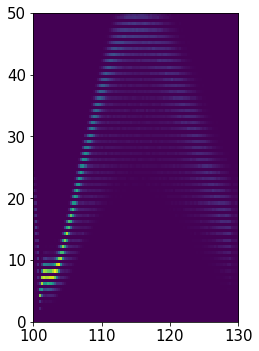

In [42]:
nsipm_int = [[] for i in range(0, nsteps)]
radii = [[] for i in range(0, nsteps)]
for v in range(5, nsteps):
    plt.subplot(2, 3, v+1)
    valid1 = [touched_sipms1_int[v] < 1.e9]
    valid2 = [touched_sipms2_int[v] < 1.e9]
    
    bins = 100
    touched_sipms_int = np.concatenate((touched_sipms1_int[v][valid1], touched_sipms2_int[v][valid2]))
    radius = np.concatenate((true_r1[v][valid1], true_r2[v][valid2]))
    radii[v] = radius
    nsipm_int[v] = touched_sipms_int
    h2 = plt.hist2d(radius, touched_sipms_int, bins=(bins, bins), range=((100, 130),(0, 50)))

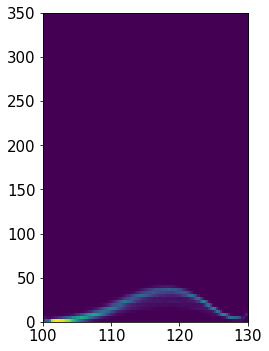

In [41]:
nsipm_ext = [[] for i in range(0, nsteps)]
radii = [[] for i in range(0, nsteps)]
for v in range(5, nsteps):
    plt.subplot(2, 3, 1)
    valid1 = [touched_sipms1_ext[v] < 1.e9]
    valid2 = [touched_sipms2_ext[v] < 1.e9]
    
    bins = 100
    touched_sipms_ext = np.concatenate((touched_sipms1_ext[v][valid1], touched_sipms2_ext[v][valid2]))
    radius = np.concatenate((true_r1[v][valid1], true_r2[v][valid2]))
    radii[v] = radius
    nsipm_ext[v] = touched_sipms_ext
    h2 = plt.hist2d(radius, touched_sipms_ext, bins=(bins, bins), range=((100, 130),(0, 350)))

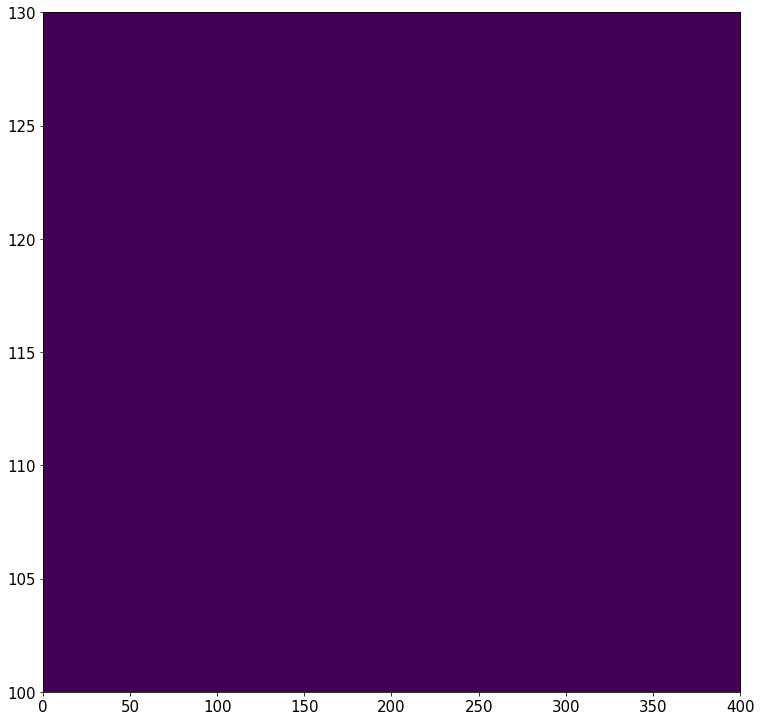

In [43]:
v = 1
valid1 = [touched_sipms1_ext[v] < 1.e9]
valid2 = [touched_sipms2_ext[v] < 1.e9]
    
bins = 100
touched_sipms_ext = np.concatenate((touched_sipms1_ext[v][valid1], touched_sipms2_ext[v][valid2]))
radius = np.concatenate((true_r1[v][valid1], true_r2[v][valid2]))
radii[v] = radius
nsipm_ext[v] = touched_sipms_ext
#h2 = plt.hist2d(radius, touched_sipms_ext, bins=(bins, bins), range=((100, 130),(0, 600)))
h = plt.hist2d(touched_sipms_ext, radius, bins=(bins, bins), range=((0, 400),(100, 130)))

(102.5002472490665, 127.49996324861196)

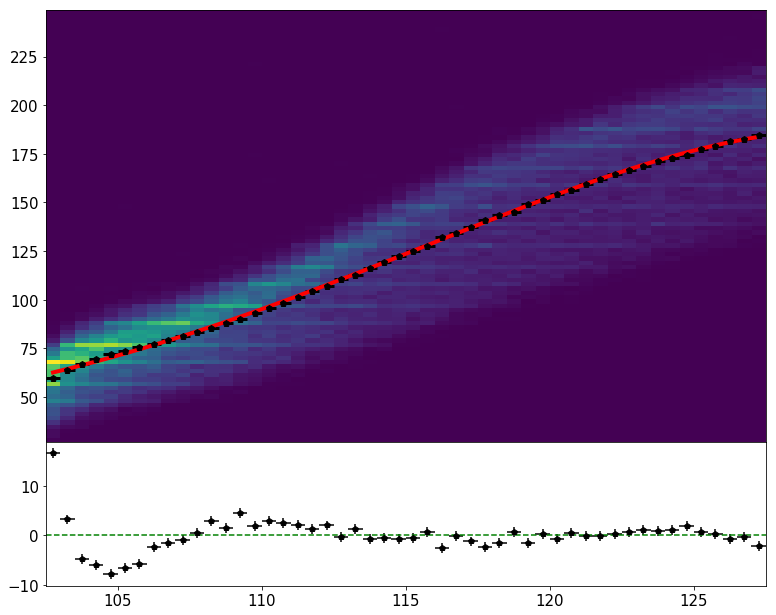

In [76]:
radlim =  102.5, 127.5
n_intlim = 0, 250
rad = radii[0]
n_int = nsipm_int[0]

sel  = in_range(rad, *radlim) & in_range(n_int, *n_intlim)
r, nint = rad[sel], n_int[sel]

frame_data = plt.gcf().add_axes((.1, .3,
                                 .8, .6))
Rbins = 50
n_intbins = 100

plt.hist2d(r, nint, (Rbins, n_intbins))

x, y, yu = fitf.profileX(r, nint, Rbins, radlim)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=7, lw=3)

#seed = expo_seed(x, y)
seed = (1, 1, 1, 1, 1)
f    = fitf.fit(fitf.polynom, x, y, seed)
plt.plot(x, f.fn(x), "r-", lw=4)

frame_data.set_xticklabels([])
#labels("", "Radius (mm)", "Ratio fit example")
lims = plt.xlim()

frame_res = plt.gcf().add_axes((.1, .1,
                                .8, .2))
plt.errorbar(x, (f.fn(x) - y) / yu, 1, np.diff(x)[0] / 2, fmt="p", c="k")
plt.plot(lims, (0, 0), "g--")
plt.xlim(*lims)

(102.5002472490665, 127.49996324861196)

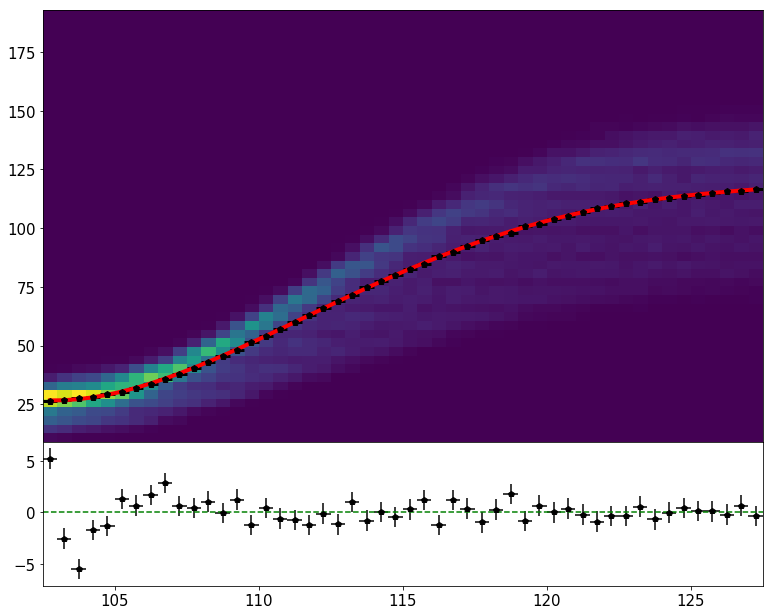

In [78]:
radlim =  102.5, 127.5
n_intlim = 0, 250
rad = radii[1]
n_int = nsipm_int[1]

sel  = in_range(rad, *radlim) & in_range(n_int, *n_intlim)
r, nint = rad[sel], n_int[sel]

frame_data = plt.gcf().add_axes((.1, .3,
                                 .8, .6))
Rbins = 50
n_intbins = 50

plt.hist2d(r, nint, (Rbins, n_intbins))

x, y, yu = fitf.profileX(r, nint, Rbins, radlim)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=7, lw=3)

#seed = expo_seed(x, y)
seed = (1, 1, 1, 1, 1)
f    = fitf.fit(fitf.polynom, x, y, seed)
plt.plot(x, f.fn(x), "r-", lw=4)

frame_data.set_xticklabels([])
#labels("", "Radius (mm)", "Ratio fit example")
lims = plt.xlim()

frame_res = plt.gcf().add_axes((.1, .1,
                                .8, .2))
plt.errorbar(x, (f.fn(x) - y) / yu, 1, np.diff(x)[0] / 2, fmt="p", c="k")
plt.plot(lims, (0, 0), "g--")
plt.xlim(*lims)

(102.5002472490665, 127.49996324861196)

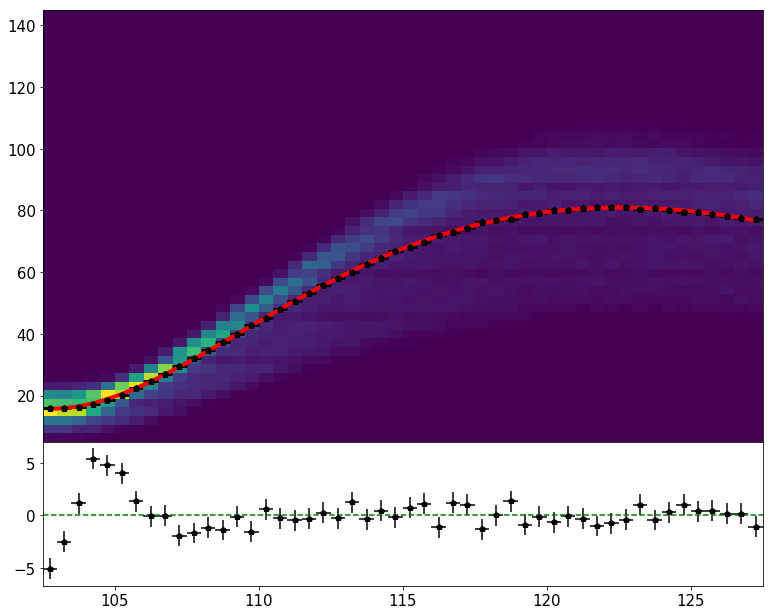

In [84]:
radlim =  102.5, 127.5
n_intlim = 0, 250
rad = radii[2]
n_int = nsipm_int[2]

sel  = in_range(rad, *radlim) & in_range(n_int, *n_intlim)
r, nint = rad[sel], n_int[sel]

frame_data = plt.gcf().add_axes((.1, .3,
                                 .8, .6))
Rbins = 50
n_intbins = 50

plt.hist2d(r, nint, (Rbins, n_intbins))

x, y, yu = fitf.profileX(r, nint, Rbins, radlim)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=7, lw=3)

#seed = expo_seed(x, y)
seed = (1, 1, 1, 1, 1, 1)
f    = fitf.fit(fitf.polynom, x, y, seed)
plt.plot(x, f.fn(x), "r-", lw=4)

frame_data.set_xticklabels([])
#labels("", "Radius (mm)", "Ratio fit example")
lims = plt.xlim()

frame_res = plt.gcf().add_axes((.1, .1,
                                .8, .2))
plt.errorbar(x, (f.fn(x) - y) / yu, 1, np.diff(x)[0] / 2, fmt="p", c="k")
plt.plot(lims, (0, 0), "g--")
plt.xlim(*lims)

In [101]:
a = [1, 2,3,4]
print(a[:-1])

[1, 2, 3]
